In [13]:
%matplotlib inline

import pyBigWig
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib 
import matplotlib.pyplot as plt

In [5]:
observed=pyBigWig.open("/oak/stanford/groups/akundaje/projects/enzymatic_bias_correction/pipeline_out/atac/SRR072187/call-align/shard-0/execution/SRR072187.4_1.merged.bam.bpnet.unstranded.bw",'r')
kmers=pyBigWig.open('/srv/scratch/annashch/5_cell_lines_bias_correction/enzymatic_bias_kmer/hg38.kmer.bias.atac.bw','r')

In [6]:
observed_chr21=np.nan_to_num(observed.values('chr21',0,observed.chroms('chr21'),numpy=True))

In [7]:
kmers_chr21=np.nan_to_num(kmers.values("chr21",0,kmers.chroms('chr21'),numpy=True))

In [9]:
#spearman
spearman_cor=spearmanr(observed_chr21,kmers_chr21)
spearman_cor

SpearmanrResult(correlation=0.06628148795816821, pvalue=0.0)

In [10]:
#pearson
pearson_cor=pearsonr(observed_chr21,kmers_chr21)
pearson_cor

(0.07251555450640255, 0.0)

Text(0.5, 1.0, 'ATAC-seq bias tracks, chr21, hg38')

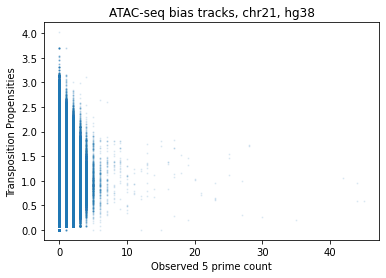

In [15]:
plt.scatter(observed_chr21,kmers_chr21,alpha=0.1,s=1)
plt.xlabel("Observed 5 prime count")
plt.ylabel("Transposition Propensities")
plt.title("ATAC-seq bias tracks, chr21, hg38")
plt.show() 

## DNASE 

In [17]:
observed=pyBigWig.open("/oak/stanford/groups/akundaje/projects/enzymatic_bias_correction/pipeline_out/atac/SRR1565781/call-align/shard-0/execution/SRR1565781.1.fastq.trimmed.gz.merged.bam.bpnet.unstranded.bw",'r')
kmer=pyBigWig.open("/oak/stanford/groups/akundaje/projects/enzymatic_bias_correction/kmer_bigwigs/hg38.kmer.bias.dnase.singlehit.bw",'r')
viestra=pyBigWig.open("/oak/stanford/groups/akundaje/projects/enzymatic_bias_correction/kmer_bigwigs/hg38.kmer.bias.dnase.vierstra.bw",'r')

In [18]:
observed_chr21=np.nan_to_num(observed.values('chr21',0,observed.chroms('chr21'),numpy=True))
kmers_chr21=np.nan_to_num(kmers.values("chr21",0,kmers.chroms('chr21'),numpy=True))
viestra_chr21=np.nan_to_num(viestra.values("chr21",0,viestra.chroms('chr21'),numpy=True))

In [21]:
print(spearmanr(observed_chr21,kmers_chr21))
print(spearmanr(viestra_chr21,kmers_chr21))
print(spearmanr(observed_chr21,viestra_chr21))

SpearmanrResult(correlation=0.10156100997096863, pvalue=0.0)
SpearmanrResult(correlation=0.6399197891199943, pvalue=0.0)
SpearmanrResult(correlation=0.10752635525186643, pvalue=0.0)


In [22]:
print(pearsonr(observed_chr21,kmers_chr21))
print(pearsonr(viestra_chr21,kmers_chr21))
print(pearsonr(observed_chr21,viestra_chr21))

(0.0986135477234425, 0.0)
(0.6470613389925012, 0.0)
(0.08909674845555783, 0.0)


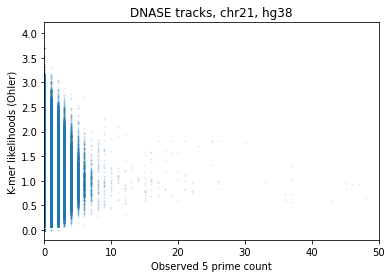

In [28]:
plt.scatter(observed_chr21,kmers_chr21,alpha=0.1,s=1)
plt.xlabel("Observed 5 prime count")
plt.ylabel("K-mer likelihoods (Ohler)")
plt.title("DNASE tracks, chr21, hg38")
plt.xlim(0,50)
plt.show() 

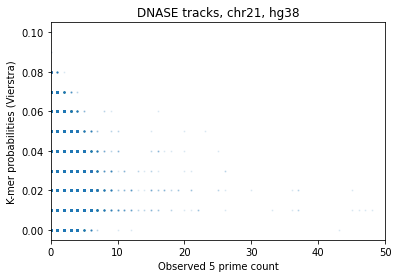

In [31]:
plt.scatter(observed_chr21,viestra_chr21,alpha=0.1,s=1)
plt.xlabel("Observed 5 prime count")
plt.ylabel("K-mer probabilities (Vierstra)")
plt.title("DNASE tracks, chr21, hg38")
plt.xlim(0,50)
plt.show() 

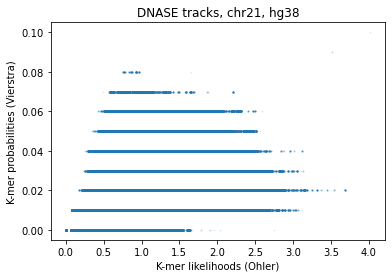

In [32]:
plt.scatter(kmers_chr21,viestra_chr21,alpha=0.1,s=1)
plt.xlabel("K-mer likelihoods (Ohler)")
plt.ylabel("K-mer probabilities (Vierstra)")
plt.title("DNASE tracks, chr21, hg38")
plt.show() 